In [72]:
!pip install pandas #pip install是下載的意思
import pandas as pd
!pip install jieba
#跟終端不同的是在Jupyter，pip前面要加上「!」
import jieba as jj #jj是別名
from tqdm import tqdm
fb = pd.read_csv('nysu_10902_2019立委_research.csv')
politics = pd.read_csv('9th_legislator_promise.csv')

ERROR: Invalid requirement: '#pip'


In [73]:
kuan = fb[fb.page_name == "管碧玲 (kuanbiling)"]
# 把時間格式轉換
kuan['new_date'] = pd.to_datetime(kuan['created_time_taipei']).dt.date
kuan['post_hour'] = pd.to_datetime(kuan['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
kuan['month_year'] = pd.to_datetime(kuan['new_date']).dt.to_period('M')

kuan.head(1)

<ipython-input-73-7c5bb8d47572>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kuan['new_date'] = pd.to_datetime(kuan['created_time_taipei']).dt.date
<ipython-input-73-7c5bb8d47572>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kuan['post_hour'] = pd.to_datetime(kuan['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
<ipython-input-73-7c5bb8d47572>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
10836,112542652141599_2285548514840991,112542652141599,管碧玲 (kuanbiling),政治人物,公務員感動的見證：我們家不搞特權！\n\n我擔任立委14年，老公「無薪階級」11年。他不搞官...,NaN,photo,https://www.facebook.com/112542652141599/posts...,2019-01-12T23:00:36+0000,2019-01-13T07:00:36,...,0,0,0,0,0,302,256,2019-01-13,7,2019-01


In [74]:
kuan[kuan.created_time_taipei == max(kuan.created_time_taipei)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
11322,112542652141599_2950527061676463,112542652141599,管碧玲 (kuanbiling),政治人物,NaN,NaN,photo,https://www.facebook.com/112542652141599/posts...,2020-01-10T14:09:40+0000,2020-01-10T22:09:40,...,0,0,0,0,0,69,27,2020-01-10,22,2020-01


In [75]:
kuan[kuan.created_time_taipei == min(kuan.created_time_taipei)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
10855,112542652141599_2268074893255020,112542652141599,管碧玲 (kuanbiling),政治人物,201❾ 祝福大家\n幸福❾❾！,NaN,photo,https://www.facebook.com/112542652141599/posts...,2019-01-01T02:41:57+0000,2019-01-01T10:41:57,...,0,0,0,0,0,10,1,2019-01-01,10,2019-01


In [76]:
kuan = kuan.sort_values(by=['like_count'])
kuan

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
11339,112542652141599_2941161235946379,112542652141599,管碧玲 (kuanbiling),政治人物,NaN,管碧玲 (kuanbiling) 更新了封面相片。,photo,https://www.facebook.com/112542652141599/posts...,2020-01-06T07:18:54+0000,2020-01-06T15:18:54,...,0,0,0,0,0,1,0,2020-01-06,15,2020-01
11347,112542652141599_2932276656834837,112542652141599,管碧玲 (kuanbiling),政治人物,願罹難的英雄們安息！\n您們正要傳送長官對辛苦弟兄的愛與期許，\n路途中，\n幻化為天使，\...,管碧玲 (kuanbiling) 更新了封面相片。,photo,https://www.facebook.com/112542652141599/posts...,2020-01-02T08:07:16+0000,2020-01-02T16:07:16,...,0,0,0,0,0,1,1,2020-01-02,16,2020-01
10889,112542652141599_245177136367215,112542652141599,管碧玲 (kuanbiling),政治人物,NaN,管碧玲 (kuanbiling) 加入了封面影片。,video,https://www.facebook.com/biling.kuan/videos/24...,2019-02-28T12:25:36+0000,2019-02-28T20:25:36,...,0,0,0,0,0,2,4,2019-02-28,20,2019-02
10966,112542652141599_2455195337876307,112542652141599,管碧玲 (kuanbiling),政治人物,母親節話家常，聊得很快樂\n\nhttps://www.facebook.com/17706...,管碧玲 (kuanbiling),video,https://www.facebook.com/112542652141599/posts...,2019-05-03T12:07:05+0000,2019-05-03T20:07:05,...,0,0,0,0,0,5,1,2019-05-03,20,2019-05
10869,112542652141599_2293359050726604,112542652141599,管碧玲 (kuanbiling),政治人物,「開放政府，行動內閣」，我們這樣做，人民會瞭解我們，支持我們！\nhttps://www.f...,管碧玲 (kuanbiling) 從「會做事 繼續衝」分享了 1 段影片。,video,https://www.facebook.com/112542652141599/posts...,2019-01-18T01:44:32+0000,2019-01-18T09:44:32,...,0,0,0,0,0,5,1,2019-01-18,9,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11239,112542652141599_2830495630346274,112542652141599,管碧玲 (kuanbiling),政治人物,難道侯友宜是韓國瑜的剋星？\n\n這是10/22眾多媒體的報導：\n\n「～～侯友宜表示，新...,NaN,photo,https://www.facebook.com/112542652141599/posts...,2019-11-19T09:35:56+0000,2019-11-19T17:35:56,...,0,0,0,0,0,275,800,2019-11-19,17,2019-11
11357,112542652141599_2925130817549421,112542652141599,管碧玲 (kuanbiling),政治人物,非常非常努力的捍衛「反滲透法」，好不容易討論完條文，多麼害怕明天的議程又會節外生枝！\n結果...,NaN,photo,https://www.facebook.com/112542652141599/posts...,2019-12-30T08:18:20+0000,2019-12-30T16:18:20,...,0,0,0,0,0,1356,875,2019-12-30,16,2019-12
11299,112542652141599_2905408216188348,112542652141599,管碧玲 (kuanbiling),政治人物,2:55分了，第九大隊才剛剛開始出發！\n第一大隊已經經過中央公園！\n光復高雄，氣勢驚人！...,NaN,video,https://www.facebook.com/112542652141599/posts...,2019-12-21T06:56:14+0000,2019-12-21T14:56:14,...,0,0,0,0,0,229,150,2019-12-21,14,2019-12
11245,112542652141599_2823264467736057,112542652141599,管碧玲 (kuanbiling),政治人物,人山人海，\n2.1萬人在線上，\n我們的熱情，\n預告光復高雄！,NaN,photo,https://www.facebook.com/112542652141599/posts...,2019-11-16T10:13:21+0000,2019-11-16T18:13:21,...,0,0,0,0,0,288,134,2019-11-16,18,2019-11


In [77]:
kuan.reset_index(inplace=True)
kuan

,index,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
0,11339,112542652141599_2941161235946379,112542652141599,管碧玲 (kuanbiling),政治人物,NaN,管碧玲 (kuanbiling) 更新了封面相片。,photo,https://www.facebook.com/112542652141599/posts...,2020-01-06T07:18:54+0000,...,0,0,0,0,0,1,0,2020-01-06,15,2020-01
1,11347,112542652141599_2932276656834837,112542652141599,管碧玲 (kuanbiling),政治人物,願罹難的英雄們安息！\n您們正要傳送長官對辛苦弟兄的愛與期許，\n路途中，\n幻化為天使，\...,管碧玲 (kuanbiling) 更新了封面相片。,photo,https://www.facebook.com/112542652141599/posts...,2020-01-02T08:07:16+0000,...,0,0,0,0,0,1,1,2020-01-02,16,2020-01
2,10889,112542652141599_245177136367215,112542652141599,管碧玲 (kuanbiling),政治人物,NaN,管碧玲 (kuanbiling) 加入了封面影片。,video,https://www.facebook.com/biling.kuan/videos/24...,2019-02-28T12:25:36+0000,...,0,0,0,0,0,2,4,2019-02-28,20,2019-02
3,10966,112542652141599_2455195337876307,112542652141599,管碧玲 (kuanbiling),政治人物,母親節話家常，聊得很快樂\n\nhttps://www.facebook.com/17706...,管碧玲 (kuanbiling),video,https://www.facebook.com/112542652141599/posts...,2019-05-03T12:07:05+0000,...,0,0,0,0,0,5,1,2019-05-03,20,2019-05
4,10869,112542652141599_2293359050726604,112542652141599,管碧玲 (kuanbiling),政治人物,「開放政府，行動內閣」，我們這樣做，人民會瞭解我們，支持我們！\nhttps://www.f...,管碧玲 (kuanbiling) 從「會做事 繼續衝」分享了 1 段影片。,video,https://www.facebook.com/112542652141599/posts...,2019-01-18T01:44:32+0000,...,0,0,0,0,0,5,1,2019-01-18,9,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,11239,112542652141599_2830495630346274,112542652141599,管碧玲 (kuanbiling),政治人物,難道侯友宜是韓國瑜的剋星？\n\n這是10/22眾多媒體的報導：\n\n「～～侯友宜表示，新...,NaN,photo,https://www.facebook.com/112542652141599/posts...,2019-11-19T09:35:56+0000,...,0,0,0,0,0,275,800,2019-11-19,17,2019-11
524,11357,112542652141599_2925130817549421,112542652141599,管碧玲 (kuanbiling),政治人物,非常非常努力的捍衛「反滲透法」，好不容易討論完條文，多麼害怕明天的議程又會節外生枝！\n結果...,NaN,photo,https://www.facebook.com/112542652141599/posts...,2019-12-30T08:18:20+0000,...,0,0,0,0,0,1356,875,2019-12-30,16,2019-12
525,11299,112542652141599_2905408216188348,112542652141599,管碧玲 (kuanbiling),政治人物,2:55分了，第九大隊才剛剛開始出發！\n第一大隊已經經過中央公園！\n光復高雄，氣勢驚人！...,NaN,video,https://www.facebook.com/112542652141599/posts...,2019-12-21T06:56:14+0000,...,0,0,0,0,0,229,150,2019-12-21,14,2019-12
526,11245,112542652141599_2823264467736057,112542652141599,管碧玲 (kuanbiling),政治人物,人山人海，\n2.1萬人在線上，\n我們的熱情，\n預告光復高雄！,NaN,photo,https://www.facebook.com/112542652141599/posts...,2019-11-16T10:13:21+0000,...,0,0,0,0,0,288,134,2019-11-16,18,2019-11


結巴斷詞 jieba

len(liu): 看劉櫂豪的貼文總共有幾筆
list(liu['message']): 把要斷詞的內容轉成 list 格式
創造一個新的dataframe叫做liu_docs，型態是pandas.core.frame.DataFrame
原本liu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [78]:
doc_names = range(len(kuan)) #管碧玲有幾篇文章
doc_names

range(0, 528)

In [79]:
import numpy as np
kuan = kuan.replace(np.nan, '', regex=True) #將nan取代成空白字串

text_list = list(kuan['message'])
kuan_docs = pd.DataFrame(columns=['jieba_results'])
kuan_docs['jieba_results'] = kuan_docs['jieba_results'].astype('str')

In [86]:
words = jj.lcut(text_list[1], cut_all = False)
print(words)

['願', '罹難', '的', '英雄', '們', '安息', '！', '\n', '您', '們', '正要', '傳送長', '官', '對', '辛苦', '弟兄', '的', '愛與', '期許', '，', '\n', '路途', '中', '，', '\n', '幻化', '為', '天使', '，', '\n', '永遠守護', '他們', '！', '\n', '引領', '與', '守護', '，', '\n', '變成', '一種', '永恆', '！']


In [81]:
words = jj.lcut(text_list[527], cut_all = False)
print(words)

['公務員', '感動', '的', '見證', '：', '我們', '家', '不', '搞', '特權', '！', '\n', '\n', '我', '擔任', '立委', '14', '年', '，', '老公', '「', '無薪', '階級', '」', '11', '年', '。', '他', '不', '搞', '官位', '、', '不', '搞', '獨董', '、', '也', '不', '當民間', '企業', '的', '顧問', '；', '甚至', '去', '找個', '相關', '的', '職業', '工會', '補', '四年', '的', '勞保年資', '，', '都', '不願', '為', '。', '\n', '「', '君子', '慎獨', '」', '！', '在', '沒', '有人', '看', '得到', '的', '地方', '，', '我們', '家', '都', '自持', '甚嚴', '。', '\n', '女婿', '追', '隨指導', '教授', '擔任', '機要', '在', '先', '，', '娶', '我', '女兒', '在', '後', '，', '不是', '因為', '我', '的', '特權', '，', '我', '特別', '再', '說明', '一次', '。', '\n', '9', '/', '18', '媒體', '炒作', '女婿', '特權', '時', '，', '有', '一個', '勞保局', '的', '官員', '，', '9', '/', '19', '就', '在', '他', '參加', '的', '群', '組公開', '作見證', '，', '公務員', '看', '多', '了', '，', '他', '從', '老公', '勞保年', '金', '怎麼領', '，', '清楚', '看到', '這是', '一個', '不', '搞', '特權', '的', '家庭', '！', '\n', '他', '說', '老公', '的', '勞保年', '金比', '家庭', '主婦', '還少', '，', '他', '感動', '的', '為', '我', '不', '搞', '特權', '作見證', '。', '\n', '說', '我'

把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。</br>

第一個迴圈</br> 剛才我們知道，劉櫂豪的篇數有999篇： 我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到999(第999篇)；</br> 而text_list就是我們剛剛轉成list型態的劉櫂豪貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。</br>

第二個迴圈</br> words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br> word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。

append加回斷詞欄位</br> 之後把text內容存到'jieba_results'這個欄位裡面，再和liu_docs合併。</br> 最後我們liu_docs，只會一個欄位jieba_results，存斷詞之後的結果。

In [100]:
import jieba
from tqdm import tqdm
import re
jieba.load_userdict("dict.txt")

punctuation = "、，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text)
    text = re.sub(r'[0-9]','',text)
    text = re.sub(r'[a-zA-Z]','',text)
    s = pd.Series({'jieba_results': text})
    kuan_docs = kuan_docs.append(s, ignore_index=True)#每次的斷詞結果都加回kuan_docs

In [101]:
kuan_docs

,jieba_results
0,
1,願 罹難 的 英雄 們 安息 您 們 正要 傳送長 官 對 辛苦 弟兄 的 愛與 期許 路...
2,
3,母親節 話 家常 聊得 很快 樂 / / . . / / / /
4,開放 政府 行動 內閣 我們 這樣 做 人民 會 瞭解 我們 支持 我們 / / . ...
...,...
1051,難道 侯友宜 是 韓國瑜 的 剋 星 這是 / 眾多 媒體 的 報導 侯友宜 表示 新...
1052,非常 非常 努力 的 捍衛 反滲 透法 好不容易 討論 完條文 多麼 害怕 明天 的 議程...
1053,分 了 第九 大隊 才 剛剛 開始 出發 第一 大隊 已經 經過 中央 公園 光 復 ...
1054,人山人海 . 萬人 在 線 上 我們 的 熱情 預告 光 復 高雄 ！


In [102]:
kuan['jieba_results'] = kuan_docs
kuan_post = kuan[['new_date','message','jieba_results','like_count']]
kuan_post


,new_date,message,jieba_results,like_count
0,2020-01-06,,,13
1,2020-01-02,願罹難的英雄們安息！\n您們正要傳送長官對辛苦弟兄的愛與期許，\n路途中，\n幻化為天使，\...,願 罹難 的 英雄 們 安息 您 們 正要 傳送長 官 對 辛苦 弟兄 的 愛與 期許 路...,14
2,2019-02-28,,,50
3,2019-05-03,母親節話家常，聊得很快樂\n\nhttps://www.facebook.com/17706...,母親節 話 家常 聊得 很快 樂 / / . . / / / /,66
4,2019-01-18,「開放政府，行動內閣」，我們這樣做，人民會瞭解我們，支持我們！\nhttps://www.f...,開放 政府 行動 內閣 我們 這樣 做 人民 會 瞭解 我們 支持 我們 / / . ...,94
...,...,...,...,...
523,2019-11-19,難道侯友宜是韓國瑜的剋星？\n\n這是10/22眾多媒體的報導：\n\n「～～侯友宜表示，新...,難道 侯友宜 是 韓國瑜 的 剋 星 這是 / 眾多 媒體 的 報導 侯友宜 表示 新...,6730
524,2019-12-30,非常非常努力的捍衛「反滲透法」，好不容易討論完條文，多麼害怕明天的議程又會節外生枝！\n結果...,非常 非常 努力 的 捍衛 反滲 透法 好不容易 討論 完條文 多麼 害怕 明天 的 議程...,6876
525,2019-12-21,2:55分了，第九大隊才剛剛開始出發！\n第一大隊已經經過中央公園！\n光復高雄，氣勢驚人！...,分 了 第九 大隊 才 剛剛 開始 出發 第一 大隊 已經 經過 中央 公園 光 復 ...,7455
526,2019-11-16,人山人海，\n2.1萬人在線上，\n我們的熱情，\n預告光復高雄！,人山人海 . 萬人 在 線 上 我們 的 熱情 預告 光 復 高雄 ！,8008


In [104]:
import matplotlib.pyplot as plt

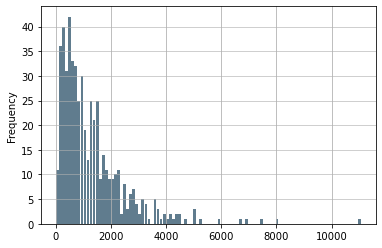

In [105]:
commutes = kuan_post['like_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [87]:
temp = kuan_post[(kuan_post['like_count'] <= 1000) & (kuan_post['like_count'] > 500)]
temp

,new_date,message,jieba_results,like_count
135,2020-01-01,新年快樂！,新年 快樂 ！,502
136,2019-05-24,我尊敬的朋友：中山大學社會系主任，王宏仁教授今天早上與市府官員的另一半，登記結婚了。\n我祝...,我 尊敬 的 朋友 中山 大學 社會 系主任 王 宏仁 教授 今天 早上 與 市府 官員 ...,503
137,2019-09-11,明天晚上要和昆澤委員合唱什麼歌呢？\n正在躊謀～～～\n\n對了，\n歡迎大家相招來𨑨迌ㄋㄟ...,明天 晚上 要 和 昆澤委員 合唱 什麼 歌 呢 正在 躊謀 對 了 歡迎 大家 相招來 ...,506
138,2019-04-16,,,508
139,2019-05-08,聲援簡煥宗議員！\n所有正義的力量，應該團結對抗霸權！,聲援 簡煥宗議員 所有 正義的 力量 應該 團結 對 抗霸權 ！,508
...,...,...,...,...
275,2019-07-17,布朗大方傳愛給台灣；\n首相：會在聯合國支持台灣\n\n在WHA為台灣強力發聲，台灣熱血的好...,布朗 大方 傳愛給 台灣 首相 會 在 聯合國 支持 台灣 在 為 台灣 強力 發聲 台...,994
276,2019-12-11,昨天通過大量歷史性的改革法案之後，\n今天「出征」到雲林，\n2020國會過半，\n改革才能...,昨天 通過 大量 歷史性 的 改革 法案 之 後 今天 出征 到 雲林 國會 過半 改革...,995
277,2019-11-27,違法荒謬劇，恕不奉陪！\n\n就在明天，立法院教育文化委員會，將上演一場荒謬劇！\n委員會召...,違法 荒謬劇 恕不奉陪 就 在 明天 立法院 教育 文化 委員會 將 上演 一場 荒謬劇 ...,999
278,2019-12-23,孩子不是被大人逗弄的玩具，對很小很小的孩子能尊重，抱娃娃之前要先試探，娃娃哭了，不能硬抱，更...,孩子 不是 被 大人 逗弄 的 玩具 對 很小 很小 的 孩子 能 尊重 抱 娃娃 之前 ...,999


In [88]:
corpus = temp['jieba_results'].values.tolist()

In [89]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

In [90]:
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=8, random_state=None)
LDA.fit(tfidf)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['真的', '捷運', '搭高雄', '加油', '穩住', '總統', '抹黑', '快來', '辣台妹', '哀傷']
TOP 10 WORDS PER TOPIC #1
['國民黨', '加油', '以及', '我們', '台灣', '援會', '天天', '支持', '老教會', '改革']
TOP 10 WORDS PER TOPIC #2
['刺針', '聖文森國會', '小年夜', '拜年', '開心', '大家', '總統', '今天', '韓國瑜', '返校']
TOP 10 WORDS PER TOPIC #3
['就是', '山西站', '那些', '他們', '此時', '炮口', '此刻', '台灣', '張善政', '失望']
TOP 10 WORDS PER TOPIC #4
['韓國瑜', '香港', '這個', '厲害', '一個', '中國', '真的', '高雄', '總統', '蘇院長']
TOP 10 WORDS PER TOPIC #5
['高雄', '大家', '臉書', '民主', '台灣', '祝福', '我們', '留言', '平安', '素人']
TOP 10 WORDS PER TOPIC #6
['守護', '美麗島', '週年', '祈禱', '我們', '捍衛國安', '電影', '一起', '台灣', '香港']
TOP 10 WORDS PER TOPIC #7
['集氣', '祈福', '所有人', '真實', '大家', '互助', '自經區', '可靠', '新年', '快樂']


In [91]:
LDA.fit(X)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['支持', '今天', '民進', '立法院', '人民', '一個', '政治', '國家', '台灣', '我們']
TOP 10 WORDS PER TOPIC #1
['總統', '人民', '中國', '沒有', '美國', '他們', '我們', '這個', '香港', '台灣']
TOP 10 WORDS PER TOPIC #2
['就是', '文山', '反滲', '可以', '這種', '中國', '總統', '國民黨', '政治', '台灣']
TOP 10 WORDS PER TOPIC #3
['香港政府', '鐵道', '教授', '外交', '台灣', '總統', '國家', '人民', '我們', '香港']
TOP 10 WORDS PER TOPIC #4
['政治', '行程', '公聽會', '不是', '總統', '考績', '觀光', '這個', '外交官', '韓國瑜']
TOP 10 WORDS PER TOPIC #5
['自己', '急情', '行政', '香港', '我們', '大家', '網路', '蘇啟', '中國', '台灣']
TOP 10 WORDS PER TOPIC #6
['沒有', '如果', '一起', '今天', '政府', '重症', '一種', '政治', '就是', '電影']
TOP 10 WORDS PER TOPIC #7
['這些', '其實', '高雄', '澳洲', '一個', '刺針', '王立強', '武器', '飛彈', '台灣']


In [96]:
politics_kuan = politics[politics.姓名 == "管 碧 玲"].政見.to_string()
politics_kuan = re.sub(re_punctuation, "", politics_kuan)
politics_kuan = re.sub(r'[0-9]','',politics_kuan)
politics_kuan = re.sub(r'[a-zA-Z]','',politics_kuan)
jieba.load_userdict("dict.txt")
words = jieba.lcut(politics_kuan, cut_all = False)
print(words)

[' ', ' ', ' ', ' ', '一', '.', '扭', '轉產業', '重北', '輕南', '之', '偏失', '，', '強化', '投資', '高雄', '，', '增進', '高雄', '子弟', '就業', '。', ' ', '二', '.', '推動', '國會', '改革', '，', '並堅持', '台灣', '與', '...']


In [97]:
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(words)  
word = vectorizer.get_feature_names() 
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

LDA.fit(tfidf)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['就業', '增進', '轉產業', '投資', '國會', '改革', '高雄', '強化', '偏失', '輕南']
TOP 10 WORDS PER TOPIC #1
['就業', '投資', '國會', '高雄', '偏失', '強化', '輕南', '改革', '增進', '轉產業']
TOP 10 WORDS PER TOPIC #2
['轉產業', '改革', '國會', '投資', '高雄', '偏失', '強化', '輕南', '子弟', '並堅持']
TOP 10 WORDS PER TOPIC #3
['增進', '就業', '轉產業', '投資', '國會', '改革', '輕南', '偏失', '強化', '高雄']
TOP 10 WORDS PER TOPIC #4
['轉產業', '投資', '改革', '國會', '高雄', '偏失', '強化', '輕南', '台灣', '推動']
TOP 10 WORDS PER TOPIC #5
['就業', '增進', '轉產業', '投資', '國會', '改革', '高雄', '強化', '輕南', '偏失']
TOP 10 WORDS PER TOPIC #6
['增進', '轉產業', '改革', '高雄', '偏失', '強化', '輕南', '國會', '投資', '就業']
TOP 10 WORDS PER TOPIC #7
['就業', '轉產業', '投資', '改革', '國會', '高雄', '偏失', '強化', '輕南', '重北']
